# Build machine learning tasks

1. Machine Learning Task: build a machine learning task, this upcoming task, which is based on the characteristics of music to predict whether music is suitable for learning or entertainment. This task is more potentially commercially viable, For example, it can help music platforms, such as Spotify, to recommend music to users with needs.
 And at the same time, it can help platforms improve the degree of personalization of playlists, help music platforms to provide users with different needs, to find potential users suitable for the music they like to listen to so that the user can have a better experience when using the platform so that users can choose the right music to listen to on suitable occasions and improve the user's adhesion to the music platform. The user's stickiness to the music platform. At the same time, it can provide appropriate background music for learning and different working and living environments. 

# The following are the key steps to define this machine-learning task well:

# Machine learning task definition
1. Task type: Classification (predict whether music is suitable for learning or entertainment)
2. Defining characteristics: danceability, energy, valence, instrumentalness
3. Expected result: the value of the activity column, which can be study or entertainment
4. Evaluation indicators: classification accuracy, as well as possible precision, recall, F1 score, etc.


In [ ]:
#Import library
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Load Data and check if the file is open
spotify_file = pd.read_csv('spotify-dataset.csv')
print(spotify_file.head())

# Data preprocessing:
1. Define targeting rules and thresholds
2. The target column activity is created as a label.
3. Ensure that all feature and target columns have no missing values.
4. Further normalization or standardization is performed on the features.
# Conditional judgment:
if row['danceability'] <= thresholds['danceability'] and row['energy'] <= thresholds['energy'] and row['instrumentalness'] >= thresholds['instrumentalness']: for each row ( For each song), check whether the danceability of the song is not greater than its threshold, whether the energy is not greater than its threshold, and whether the instrumentalness is not less than its threshold.
If all these conditions are met, it means that this song may be more suitable for learning (less danceable, lower energy, higher instrumental), so set the activity of this row to study.
Otherwise, if any of the conditions are not met, set the activity of the row to entertainment, which means that this song may be more suitable for entertainment activities.

In [2]:
thresholds = {
    'danceability': spotify_file['danceability'].median(),
    'energy': spotify_file['energy'].median(),
    'instrumentalness': 0.6,  
}

# Create target columns based on defined rules
spotify_file['activity'] = spotify_file.apply(
    lambda row: 'study' if row['danceability'] <= thresholds['danceability'] and 
                              row['energy'] <= thresholds['energy'] and
                              row['instrumentalness'] >= thresholds['instrumentalness']
                          else 'entertainment',
    axis=1
)

# Separate features and target variables
features = ['danceability', 'energy', 'valence', 'instrumentalness']
X = spotify_file[features]
# Assume your DataFrame has a 'track_genre' column
y = spotify_file['activity']

# Handling missing values
X = X.dropna()
# Check each column for missing values
missing_values = spotify_file.isnull().sum()
#print(missing_values)

has_missing_values = spotify_file.isnull().values.any()
#print('Are there any missing values? ', has_missing_values)

# If there are missing values, delete rows containing missing values
if has_missing_values:
    # inplace=True means modifying directly on the original DataFrame. Without it, a new DataFrame is returned.
    df = spotify_file.dropna()

# Handling missing values
X = X.dropna()

# Model selection: 
model selection, because there are many classification models in machine learning, such as logistic regression, random forest, gradient boosting, number support, vector machine, and many other models. Currently, according to the constructed task, the model I have chosen is the Random Forest model and logistic regression model.

After constructing the model, you can use the training dataset to train the model, and after training the model, you can define several hyper-parameters for tuning, and then select an optimal model through the continuous adjustment of parameters

# Random forest model:

In [ ]:
# If the target column is a string and your model requires numeric input, use LabelEncoder to convert the label to an integer
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Divide the data set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Create model instance
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4, random_state=42)
model.fit(X_train_scaled, y_train)

# Model selection and hyperparameter tuning
classifier = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(classifier, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Prediction and evaluation models
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))


# Random forest tuning parameters:
Among the random forest models. There are such parameters that can be adjusted. After adjusting the parameters, the changes in the model are observed according to the different parameters and the optimal parameter values are obtained
The modification and interpretation of these parameters are shown in the following code:

In [ ]:
'''model = RandomForestClassifier(n_estimators=150,  # Increase the number of trees
                               max_depth=10,       # Set the maximum depth of the tree
                               min_samples_split=4, # Set the minimum number of samples required to split an internal node
                               random_state=42)'''

# Logistic regression model:
Among the random forest models. There are such parameters that can be adjusted. After adjusting the parameters, the changes in the model are observed according to the different parameters and the optimal parameter values are obtained.

In [8]:
# encoding target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model and train it
logistic_model = LogisticRegression(C=0.1, random_state=42, max_iter=1000)
# Use L2 regularization and compatible solvers
logistic_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
logistic_model.fit(X_train_scaled, y_train)



# predict
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Evaluation model
print(classification_report(y_test, y_pred_logistic))
print('Accuracy (Logistic Regression):', accuracy_score(y_test, y_pred_logistic))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21563
           1       0.89      0.84      0.86      1237

    accuracy                           0.99     22800
   macro avg       0.94      0.91      0.93     22800
weighted avg       0.98      0.99      0.99     22800

Accuracy (Logistic Regression): 0.985219298245614


# Adjust Logic Review Model Parameters:
Among the logistic regression models, again there are some parameters that can be adjusted to change the model. 
Specific parameter adjustments and explanations are shown in the code below:

In [ ]:
'''logistic_model = LogisticRegression(C=0.1,      # Set regularization strength
                                    penalty='l2', # Set the regularization term to use, 'l1', 'l2', 'elasticnet' or 'none'
                                    max_iter=1000, # Set the maximum number of iterations for algorithm solution
                                    random_state=42)
'''

# Random forest model visualization:

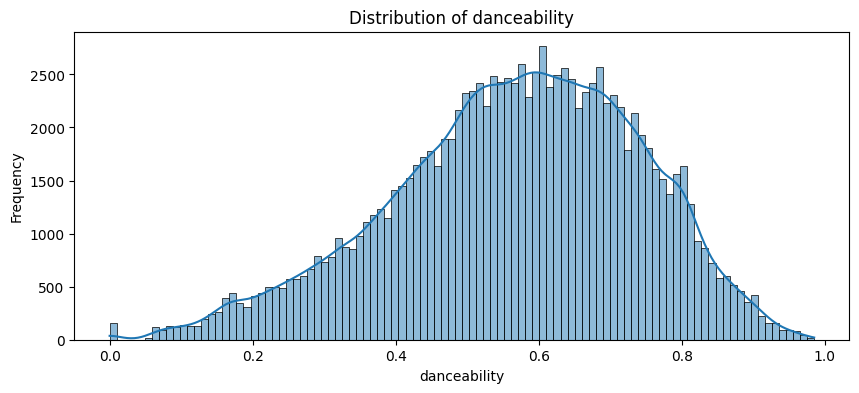

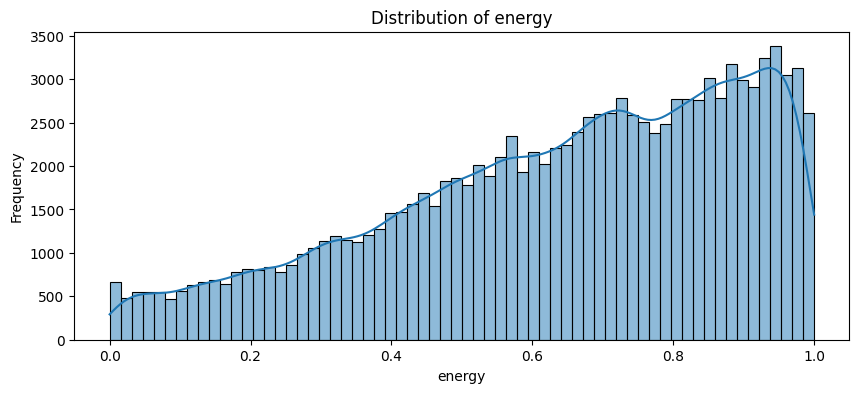

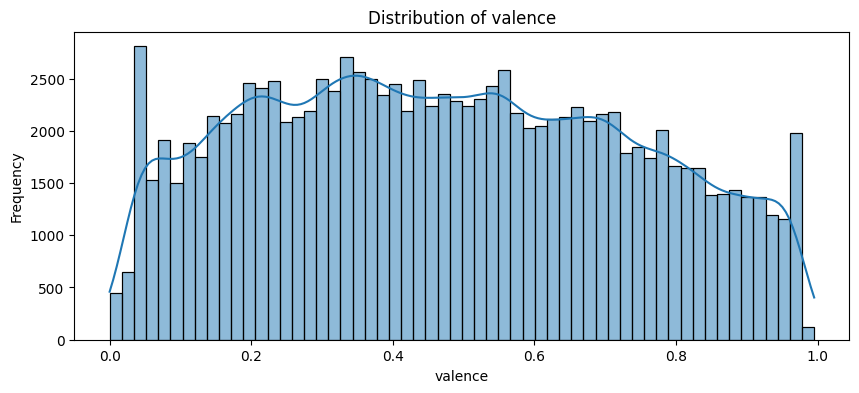

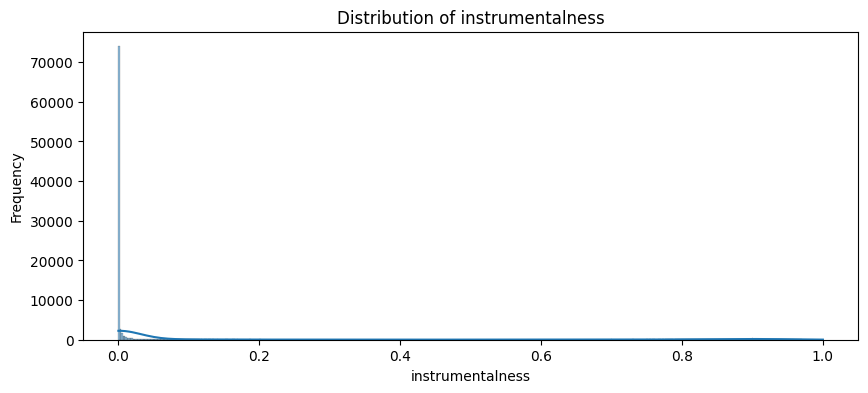

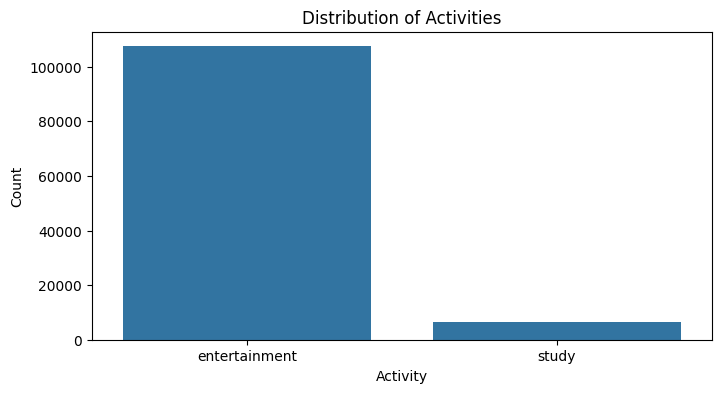

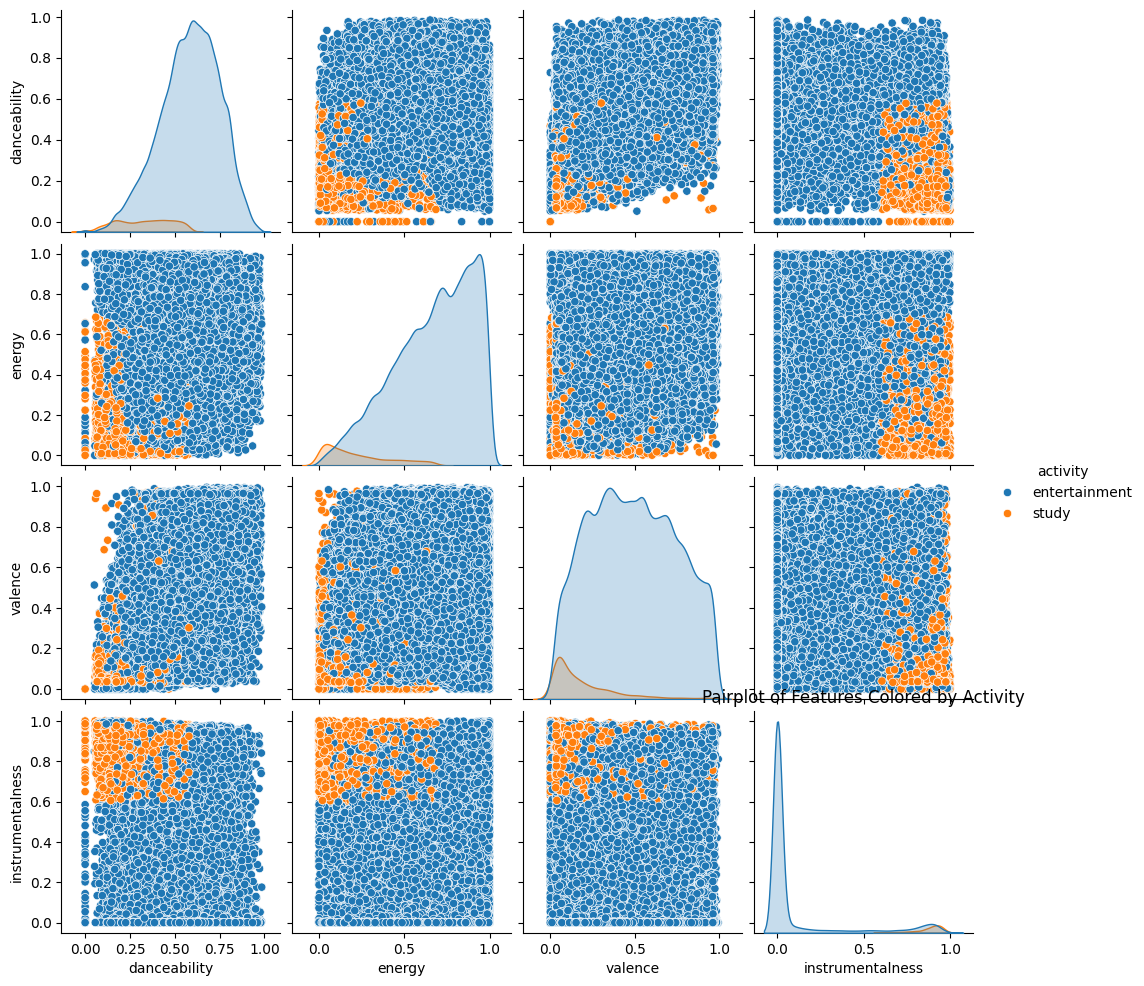

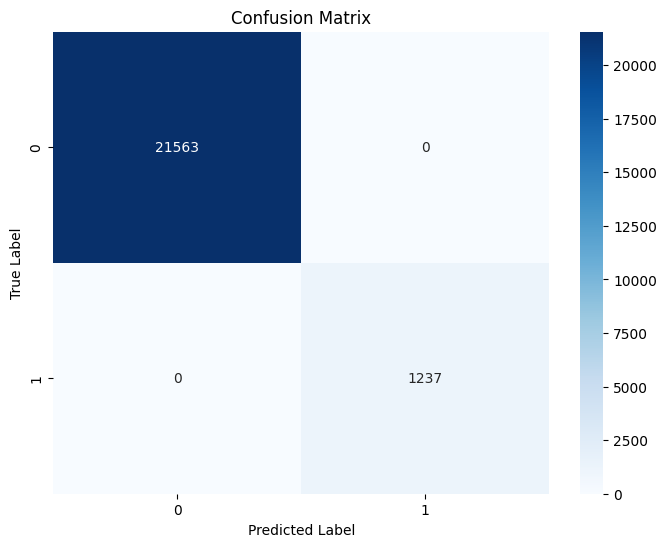

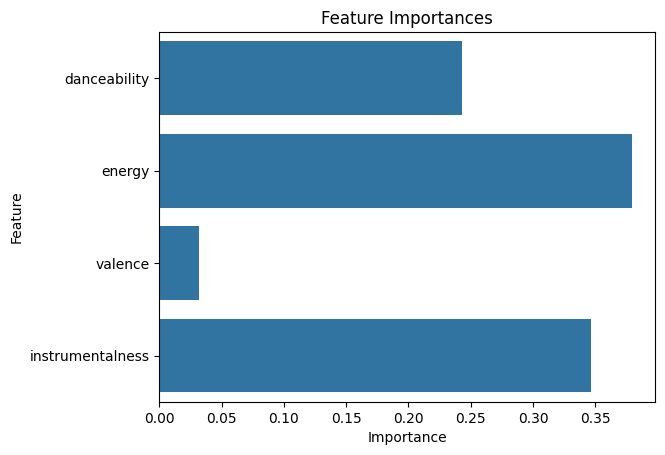

In [4]:
#Visualization
# Plot the distribution of features
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(spotify_file[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# target variable ratio
plt.figure(figsize=(8, 4))
sns.countplot(x=spotify_file['activity'])
plt.title('Distribution of Activities')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

# relationship between features
sns.pairplot(data=spotify_file[features + ['activity']], hue='activity')
plt.title('Pairplot of Features Colored by Activity')
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

feature_importances = model.feature_importances_
# Create a bar chart of feature importance
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Logistic regression model visualization:

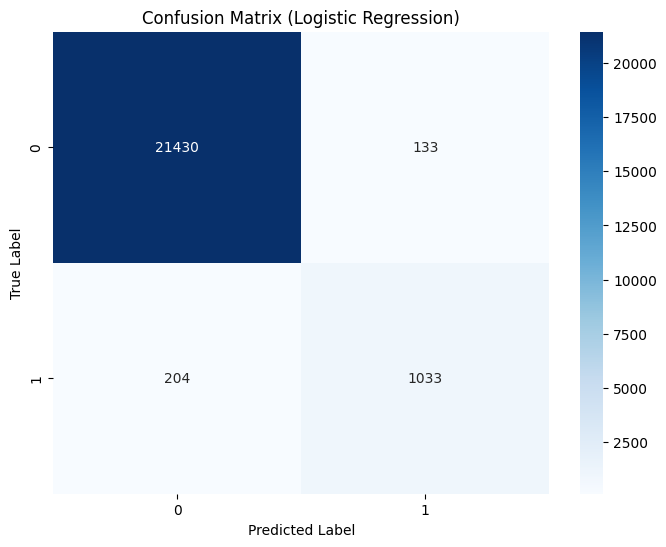

In [9]:
# Visualization
# Plot confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Comments and insights:
# Analyses:
1. the distribution of musical features as well as the distribution of activity goals:
After the models have been run, a very detailed dataset is shown. This contains detailed results for the Random Forest and Logistic Regression models, as well as visualisations of the data and type performance in both models. The visualisation and classification reports indicate that the model has been analysing the characteristics of the music tracks, such as danceability, energy value and instrumentality, and has been trying to find relationships between these characteristics and activities such as entertainment and learning, as required and tasked.
In the random forest model, the reported precision is 1.0, which means that the classification is quite perfect, but in practice it is a bit unrealistic, here it could indicate overfitting or some problems with the dataset, in the logistic retrospective model it is gradually approaching 1, this value does not reach 1.0, but in real practice it is a more normal value, which indicates that it will be infinitely This value does not reach 1.0, but it is a normal value in real practice, which indicates that it will be infinitely close to 1.0, which also indicates that such a classification is close to perfection.
From the analysis of the distribution of musical features, the histogram can clearly show the distribution of different musical features, such as danceability, energy and value of emotional value of the features are normally distributed, most of the values are concentrated near the average, but the distribution of instrumental highly skewed is more obvious, which means that most of the repertoire of the instrumental content is relatively low. Through the distribution of music characteristics can be inferred in the commercial value of its application, in fact, the music platform to take more into account, the audience group more like the type of music, so as to recommend. Due to the lower audience of instrumental music content, it is more necessary to carry out a bit of personalisation. Because there is a small portion of the audience that prefers instrumental music, this content is recommended to be personalised to highlight the preferences of niche groups and to meet the needs of the niche groups.
2. Feature matching chart, coloured by activity:
Among the feature matching graphs, the analysis is done according to the activity target variable, and the scatter plot also reveals the correlation of the model between the features. Through the colouring of the activity, it can be seen that the learning tracks may have a different distribution of features from the entertainment tracks, which is more obvious in the features of energy and instrumental music.
3. Confusion matrix:
The confusion matrix shows that the classification of Random Forest is perfect, but this is doubtful in real practice. The logistic regression model is not perfect but the model data is relatively high, so there may be some false alarms and omissions in the logistic regression, which is more common in real data and practice, and it is closer to the analysis of real-life scenarios.
4. Feature importance:
Among the feature importance, the bar chart shows that instrumental music is the most important feature in the classification model, followed by emotional value, energy and danceability. This shows that instrumentality is a very dominant and important feature in the current classification.

# Evaluation and commercial value:
1. Model Comparison Evaluation:
In both models, the degree of perfection of the report is a very important reference. The perfection of the model indicates that there are doubtful parts in it, which may be the result of data omission, over-fitting or over-distortion, leading to data imbalance. In this, techniques such as cross-validation can actually be used to check the precision, recall and F1 score to understand the performance of the model in a more detailed way. Among these two models, by comparing them, the better choice would be the logistic regression model as its accuracy is infinitely close to one. This shows that it is more realistic in practice, and the logistic regression model is also more adept at dealing with dichotomous problems, as the definition in this task is actually a classic dichotomous problem. This reflects the advantages and characteristics of the logistic regression model.
2. Market Analysis:
It is very clear from the report that the market preference is for entertainment tracks much more than learning tracks, so when considering the development of playlists and albums to satisfy a large market, more weight needs to be placed on entertainment tracks, but also the preferences of niche groups need to be taken into account, and in the process the market should also be learnt to be segmented to create specific products. This way after dividing their products into more and better options, they can go on to satisfy more groups.
3. Product development:
In the process of product development, the low energy and highly instrumental nature of the learning repertoire is a key feature, and these insights can be used to plan, or create, or open up repertoire that meets these criteria in order to satisfy a variety of audience segments. The emotional value aspect is also important, and it is linked to the positive aspects of the tracks. In this process, entertainment tracks can be refined to create playlists with different levels of emotional value, and this development can be applied to different states of mind and different occasions.
4. Personalisation:
Using these insights, recommendations can be personalised according to the user's activity goals, e.g. users who are studying may prefer instrumental and low-energy tracks. At the same time, different types of music can be used to meet the occasion and needs of the moment.
5. Quality Assurance:
Re-evaluate the model to ensure that it can be better promoted, need to go to modify the overfitting situation, collect more data, analyse more features, formulate more target variables, so as to meet the different user preferences and needs for music, can be better for the platform to promote the recommendation, so as to meet the platform and the user to the choice between the user to improve user stickiness, so that the user's experience is more, let the user More dependent on the music platform.


# Reference
1. AI usage instructions: During the creation process of this model, since the accuracy of the random forest model is one, we referred to the opinions of Open AI and found out a situation of over-perfection and over-fitting through the identification of open AI. , but no solution has been found so far. In this regard, open AI is used to solve the problem.
2. Stoltzfus J C. Logistic regression: a brief primer[J]. Academic emergency medicine, 2011, 18(10): 1099-1104.
3. Biau G. Analysis of a random forests model[J]. The Journal of Machine Learning Research, 2012, 13(1): 1063-1095.